In [8]:
from neurosynth import meta, decode, network, Dataset
import pandas
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from nilearn import plotting

In [2]:
# dataset = pickle.load( open( "dataset.p", "rb" ) )
dataset = Dataset('neurosynth-data/database.txt')

In [3]:
terms = pandas.read_csv('neurosynth-data//analysis_filter_list.tsv',delimiter='\t')

In [101]:
kept_terms = terms['term'][terms['keep']==1]
np.savez("neurosynth_terms",'kept_terms')

In [66]:
maps = {}
for term in kept_terms:
    ids = dataset.get_studies(term)
    ma = meta.MetaAnalysis(dataset, ids)
    maps[term] = ma.images['association-test_z']
    ma.save_results(os.path.join('neurosynth-data','maps',term))
    

In [102]:
concat_maps = np.vstack((maps[k] for k in maps.keys()))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [5]:
# concat_maps = pickle.load(open("concat_maps.p","rb"))

In [47]:
pca = PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False).fit(concat_maps)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[0.10724451 0.07186315 0.04695774 0.03718591 0.03011859 0.02566107
 0.01888798 0.01386358 0.01315753 0.01177422]
[7371.67572625 6034.36808339 4877.89306864 4340.78108748 3906.57327303
 3605.9198214  3093.65168397 2650.43018438 2582.05704895 2442.55696384]


(91, 109, 91)


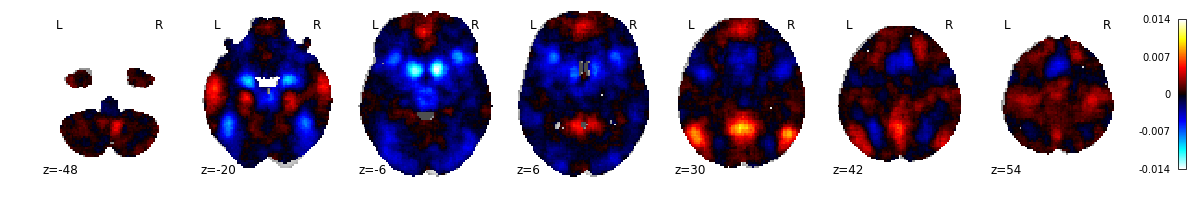

In [98]:
components = np.array([dataset.masker.unmask(pca.components_[i],output='array') for i in range(10)])
np.savez('components',components)

In [102]:
term_weights = pca.transform(concat_maps)
np.savez('term_weights',term_weights)

In [87]:
a = term_weights[:,5].argsort()[::-1]

In [88]:
kept_terms.iloc[a]

732                     default
733                default mode
2530                    resting
2531              resting state
869                         dmn
2217        posterior cingulate
1927                network dmn
2242                  precuneus
1215    functional connectivity
1765          medial prefrontal
2977                theory mind
278            autobiographical
734             default network
535                connectivity
2127                        pcc
1819                       mind
2619           self referential
1791              mental states
1815                    midline
2423                referential
1820                   mind tom
658                  cortex pcc
2999                        tom
2780                spontaneous
189                     angular
1760                     medial
2215                  posterior
2529                       rest
998                    episodic
1611           lateral parietal
                 ...           
286     

size(components)